In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [259]:
def init_df(n):
    columns = ['fname', 'n', 't_opt','t','eval_opt','eval','c0','c1','c2','c3','iter_danger','neigh','popsize','niter','seed','y']
    for i in range(n):
        columns += ['x'+str(i)]
    #print(columns)
    return pd.DataFrame(columns=columns)
def proc_line(df, line, fname, n):
    s = line.split('|')
    s.pop()
    s = [float(x) for x in s]
    df.loc[df.shape[0]] = [fname, n] + s    
def load_file(filename, fname, n):
    with open(filename) as f:
        data = f.readlines()
        tdf = init_df(n)
        for line in data: proc_line(tdf,line, fname, n) 
    return tdf

In [282]:
def plot_1(df, param, y='y', path="./plots/", ext='png', show=True):
    fig, axs = plt.subplots(3, 3, figsize=(15,12))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    paramdf = df[df[param]!=dflt[param].values[0]]
    dfltdf = df.loc[[0,1,2]]
    axn = -1
    for fname in ['ackley','dejong','rastrigin']:
        tdf = paramdf[paramdf['fname']==fname]
        for g in sorted(np.unique(tdf['g']), key=len):
            axn += 1
            for seed in [0,10,100]:
                axid = int(axn/3)
                axid2 = axn%3
                tdf2 = tdf[(tdf['g'] == g) & (tdf['seed']==seed)]
                dfltdf2 = dfltdf[(dfltdf['g'] == g) & (dfltdf['seed']==seed)]
                tdf2 = pd.concat([tdf2, dfltdf2]).sort_values(by=param)
                ax = axs[axid, axid2]
                xval = tdf2[param]
                yval = tdf2[y]
                ax.scatter(xval,yval)
                ax.plot(xval, yval, label = ' seed: ' + str(seed), alpha = 0.8)
                ax.title.set_text(f"{fname.capitalize()} n = {tdf2['n'].values[0]}")
                ax.legend()
                ax.set_xlabel(param)
                ax.set_ylabel(y)


                #!!!!!!!!!!!!!!SET XTICK TO PARAM VALUES
                #ax.set_xticks(tdf2[param])
                
                ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

                med = yval.median()
                #ax.set_ylim([yval.min()*0.98, med*1.2])
                match g:
                    case 'ackley10':
                        match param:
                            case 'c0':
                                ax.set_ylim([-0.001,.02])
                            case 'popsize':
                                ax.set_ylim([0.00005,0.0006])
                                
                if param in ['c1','c2','c3']:
                    t = ax.get_xticks()
                    t = t[t!=0.01]
                    ax.set_xticks(t)

    fig.suptitle(f"Parametr {param}", y = 0.95, fontsize=25)
    fig.savefig(path + f'{param}.{ext}', bbox_inches='tight')
    if (show):
        plt.show()
    else: 
        return 0

C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)


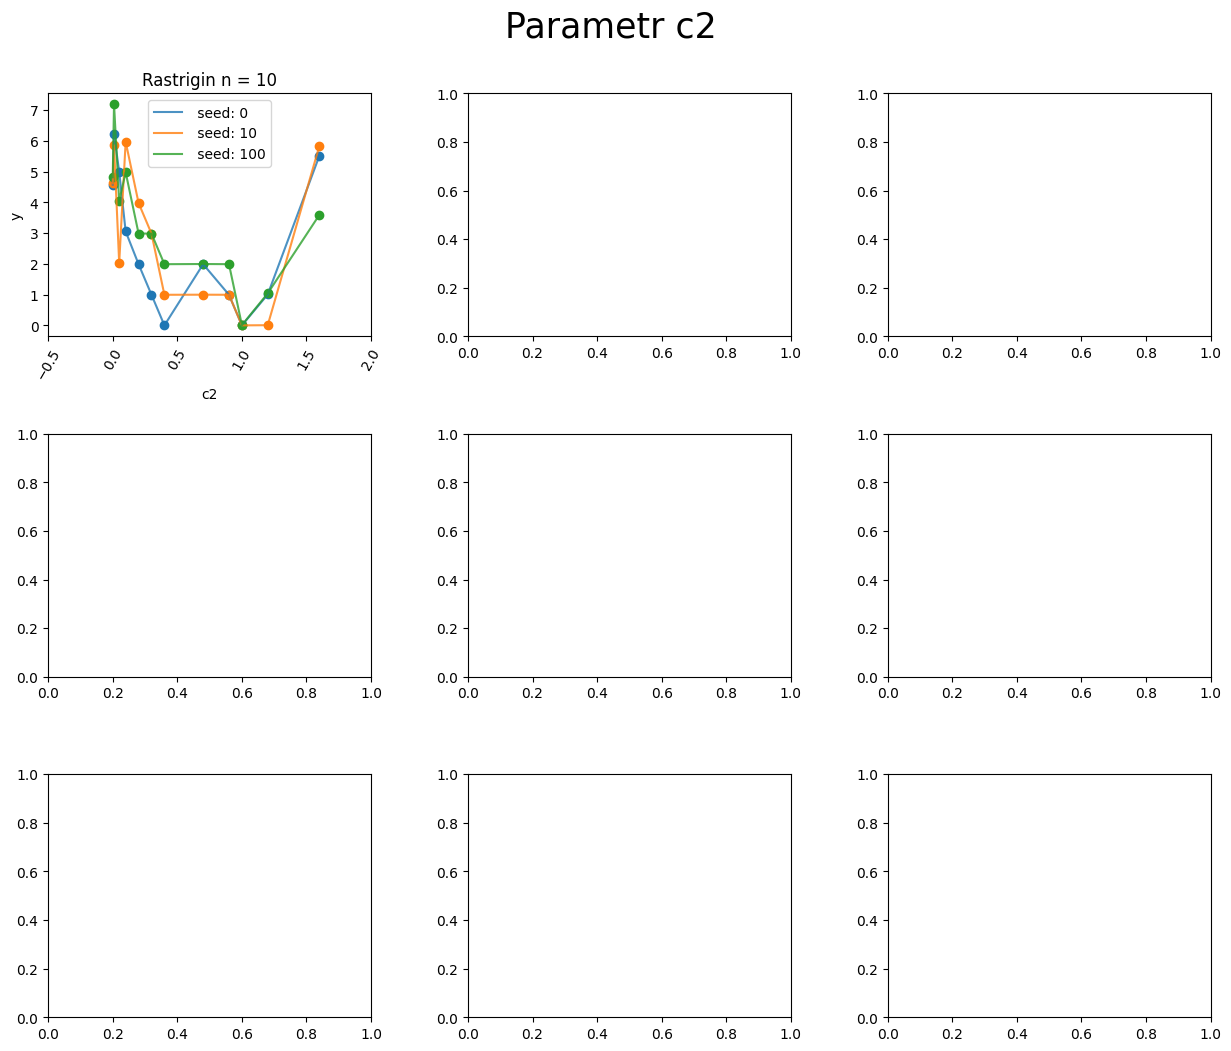

In [285]:
filename = "./CW 10 PSO_OPT/report_PSO_auto.txt"
#filename = "./CW 10 PSO_OPT/results/ackley/report_PSO_auto_10.txt"
fname = 'rastrigin'
n = 10
df = load_file(filename, fname, n)

df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]
dflt = df.head(1)

for param in ['c2']:
    plot_1(df,param)

C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),

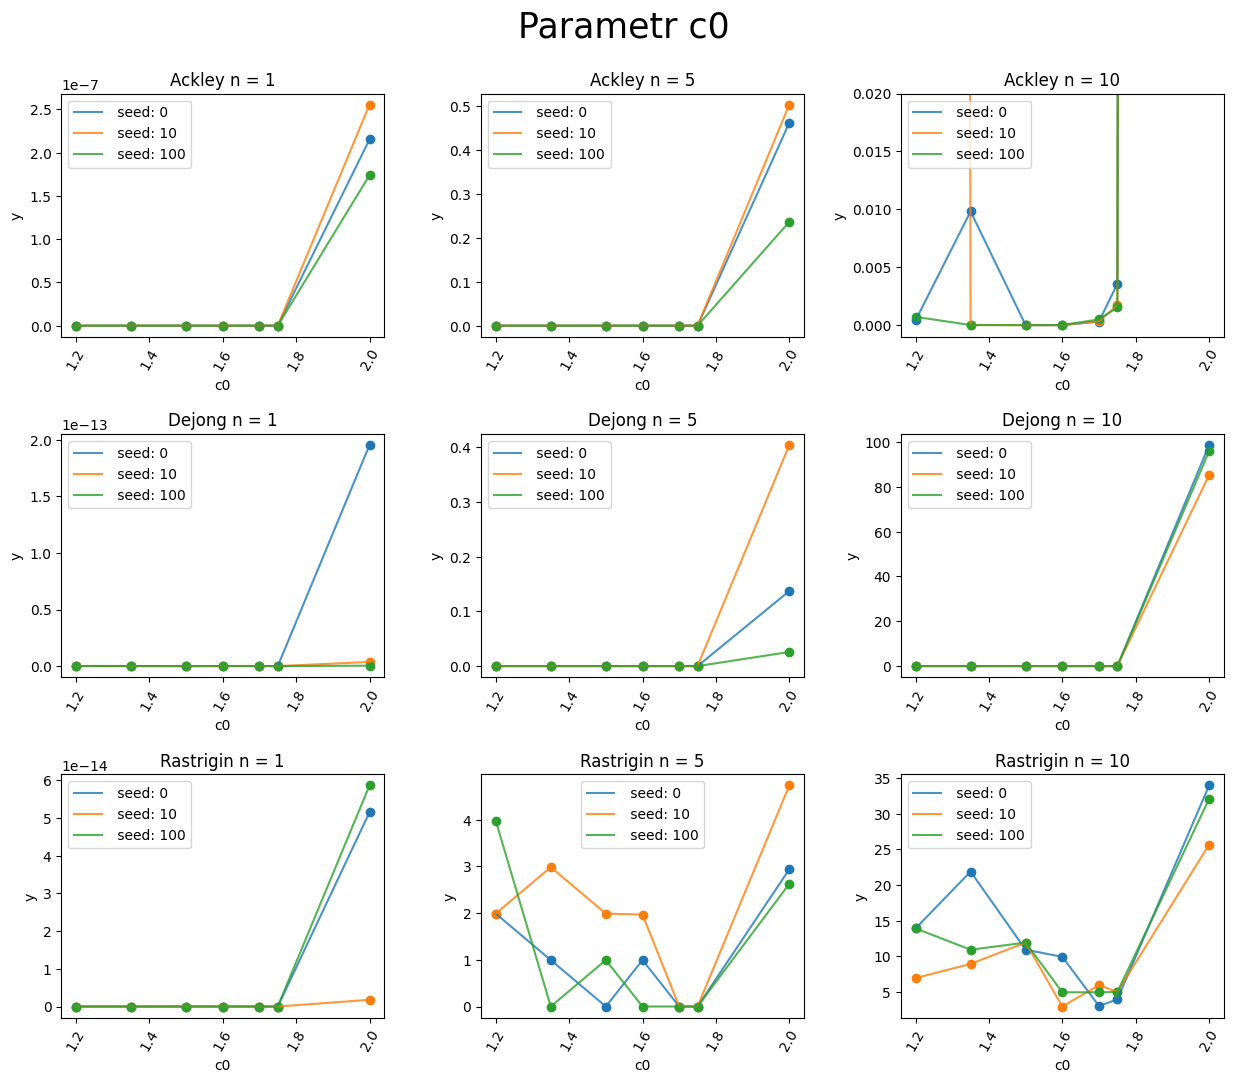

C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),

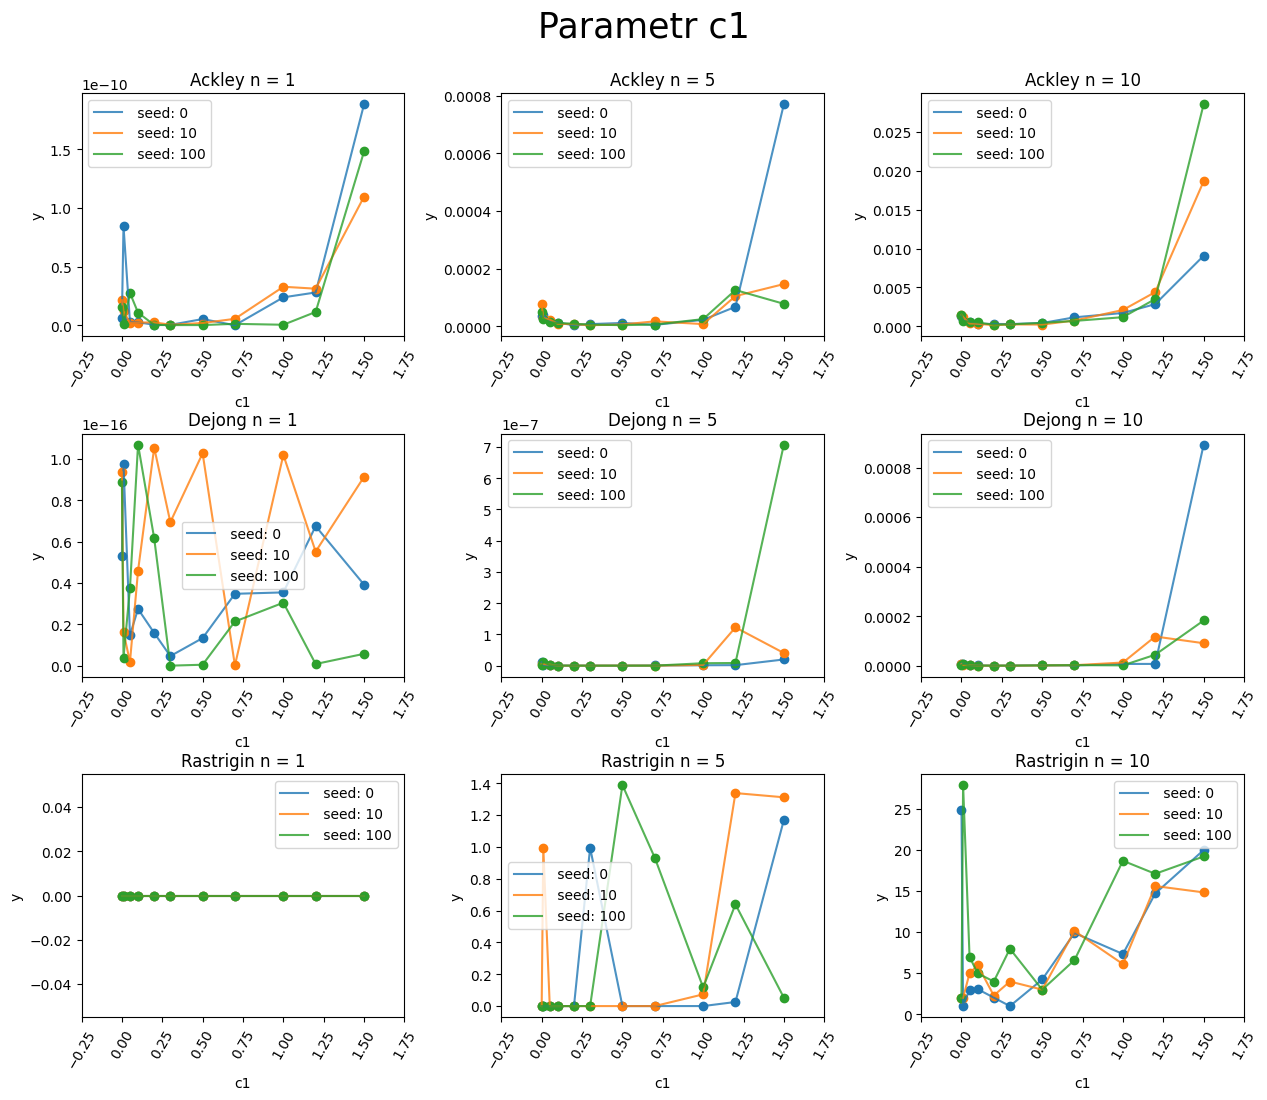

C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),

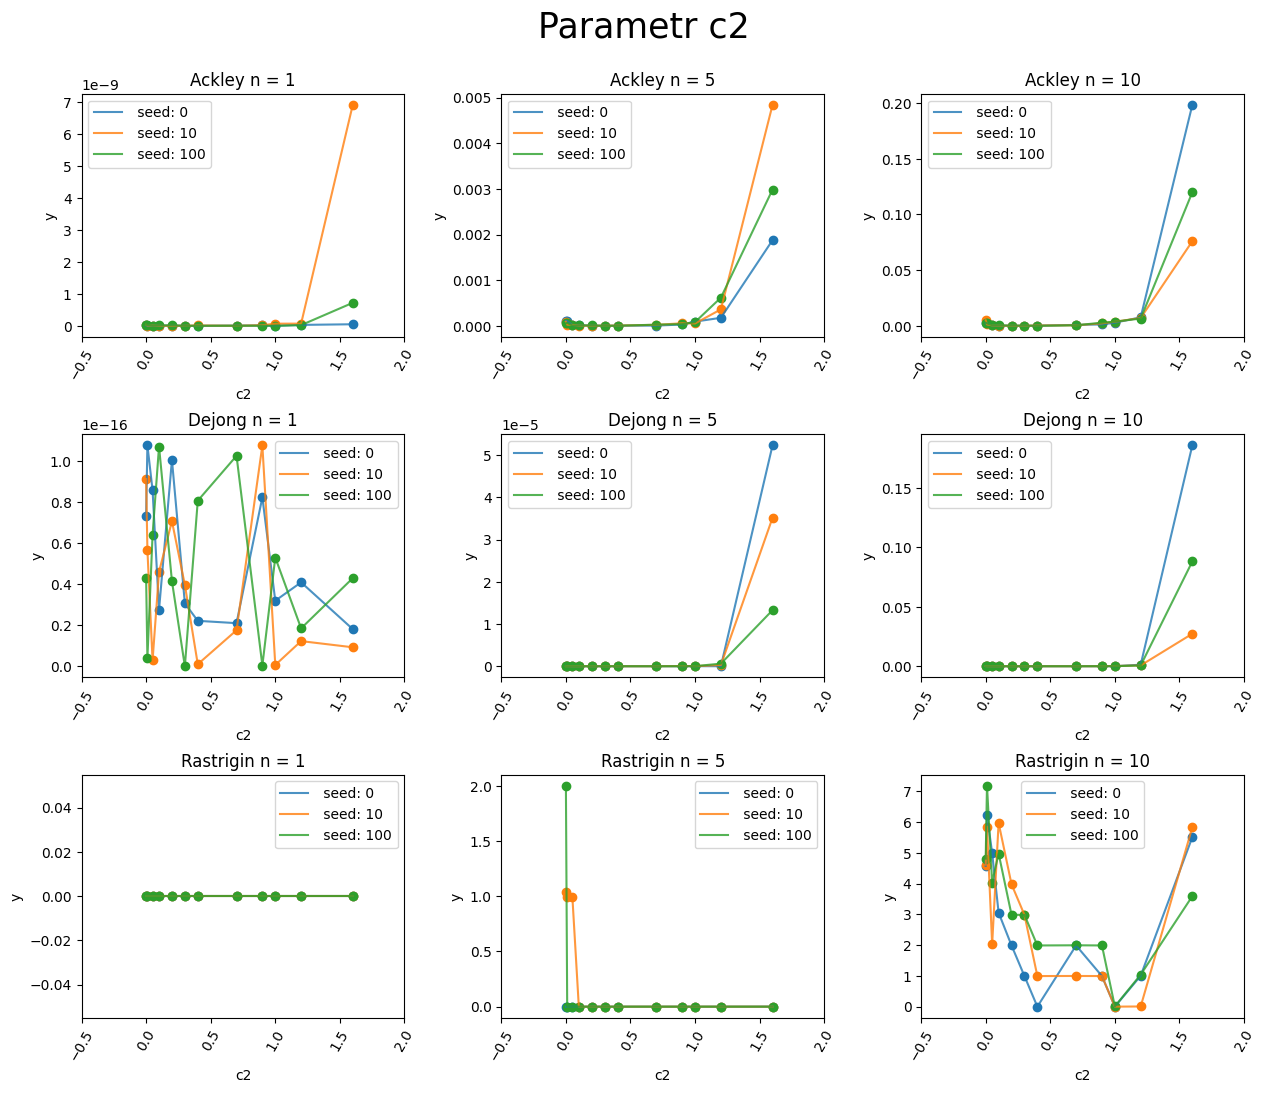

C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),

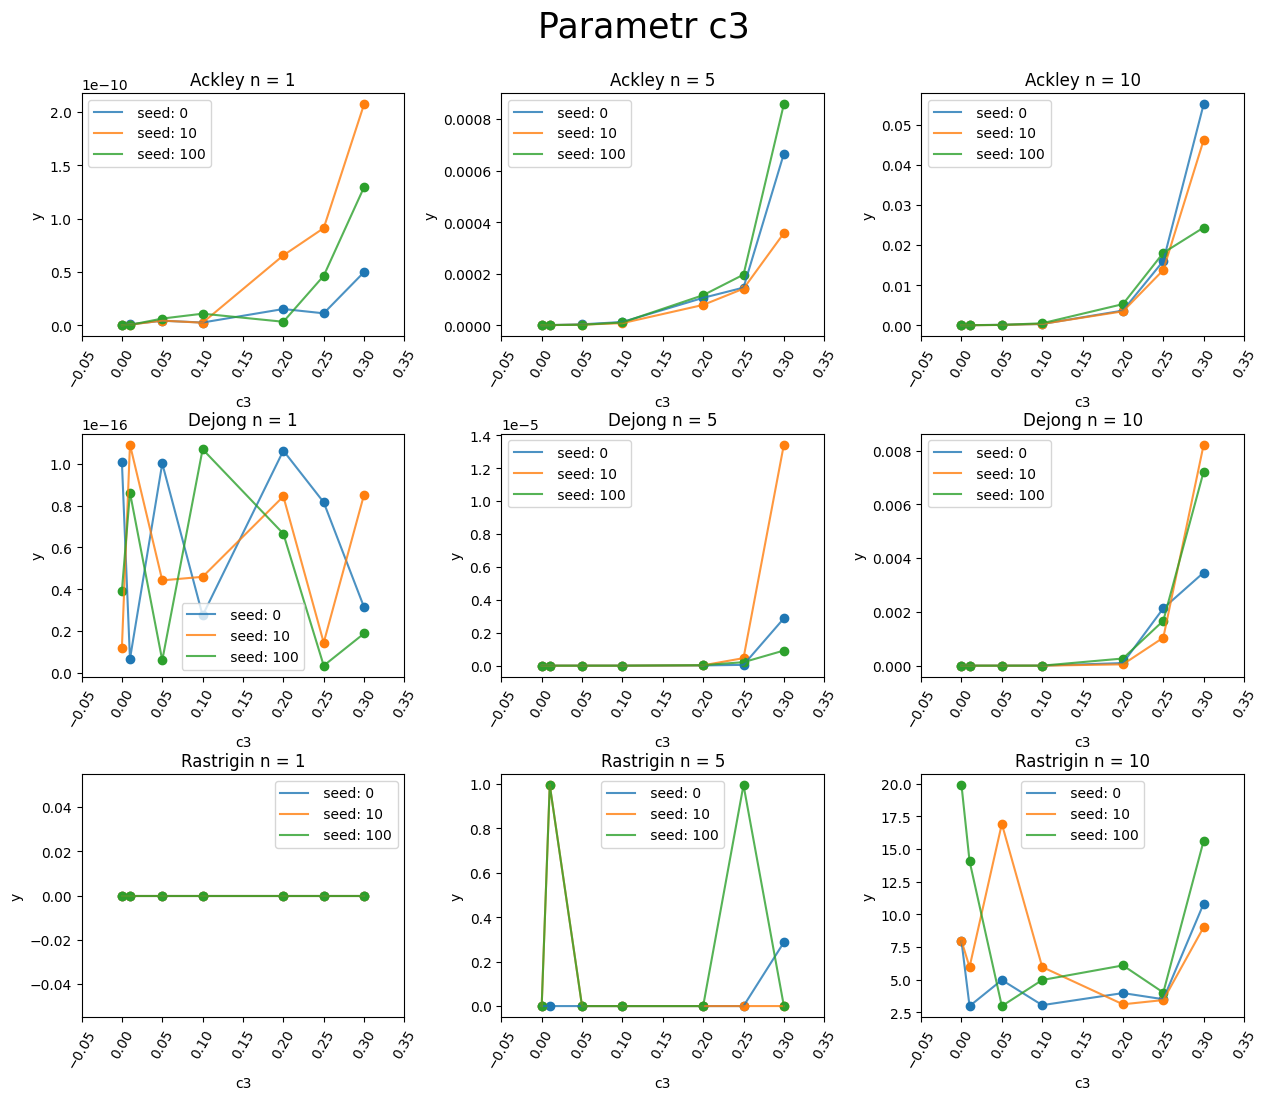

C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),

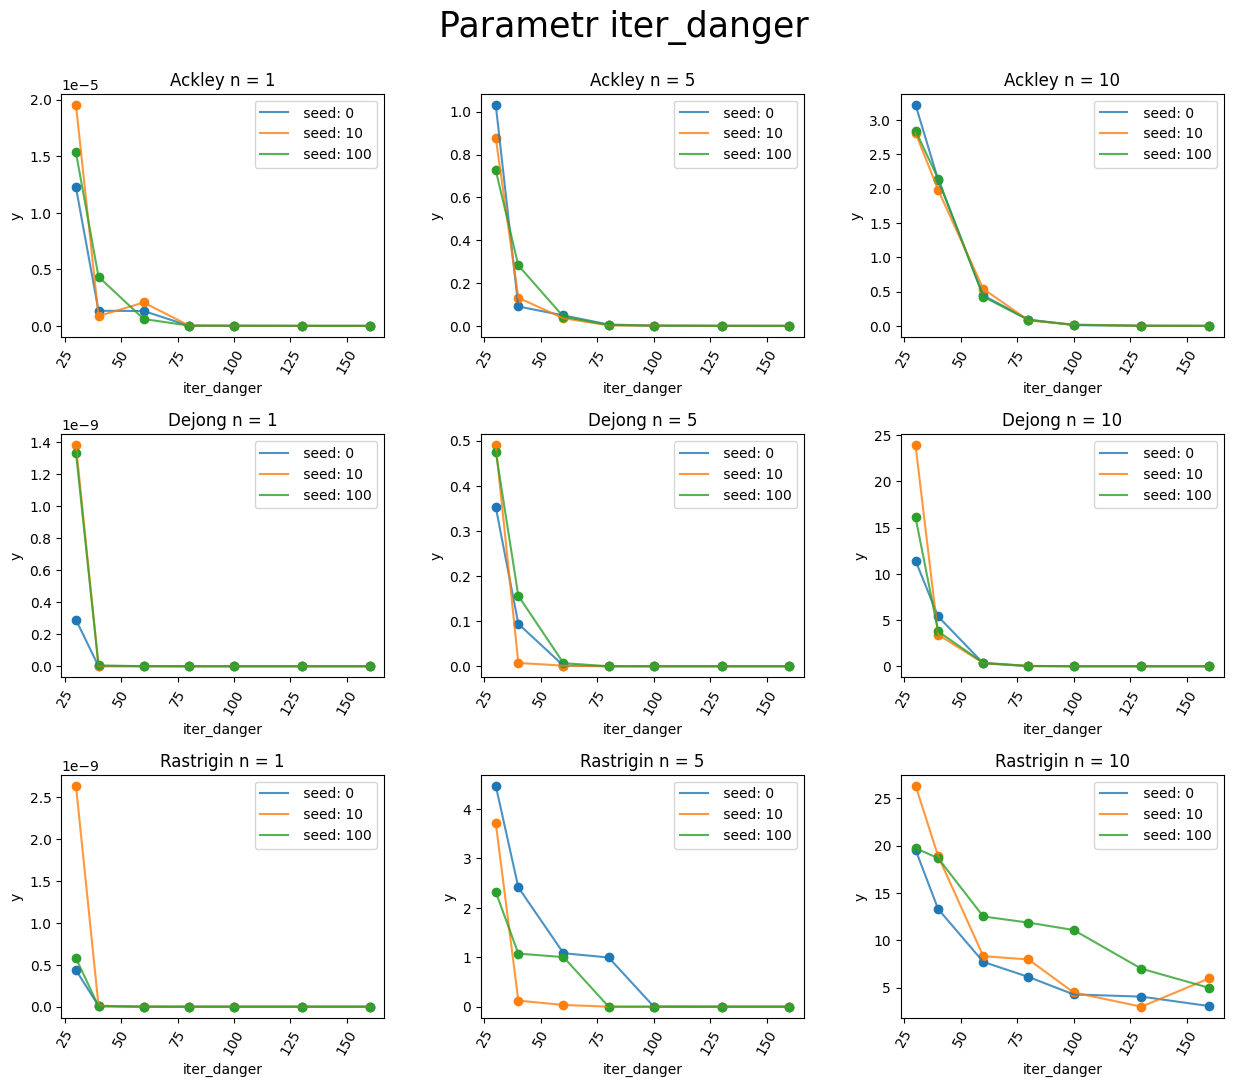

C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),

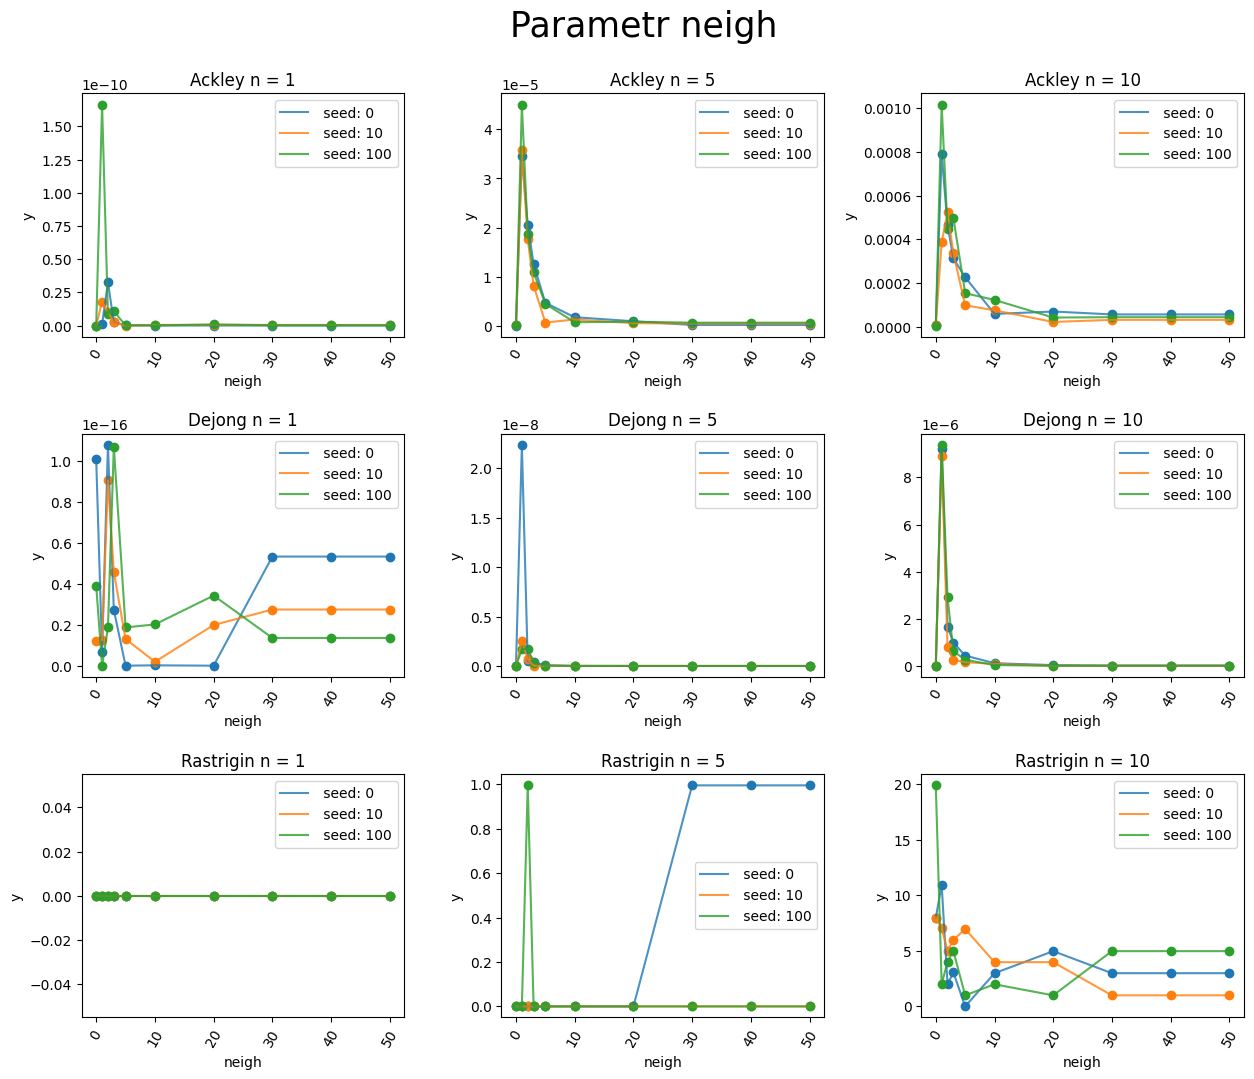

C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),

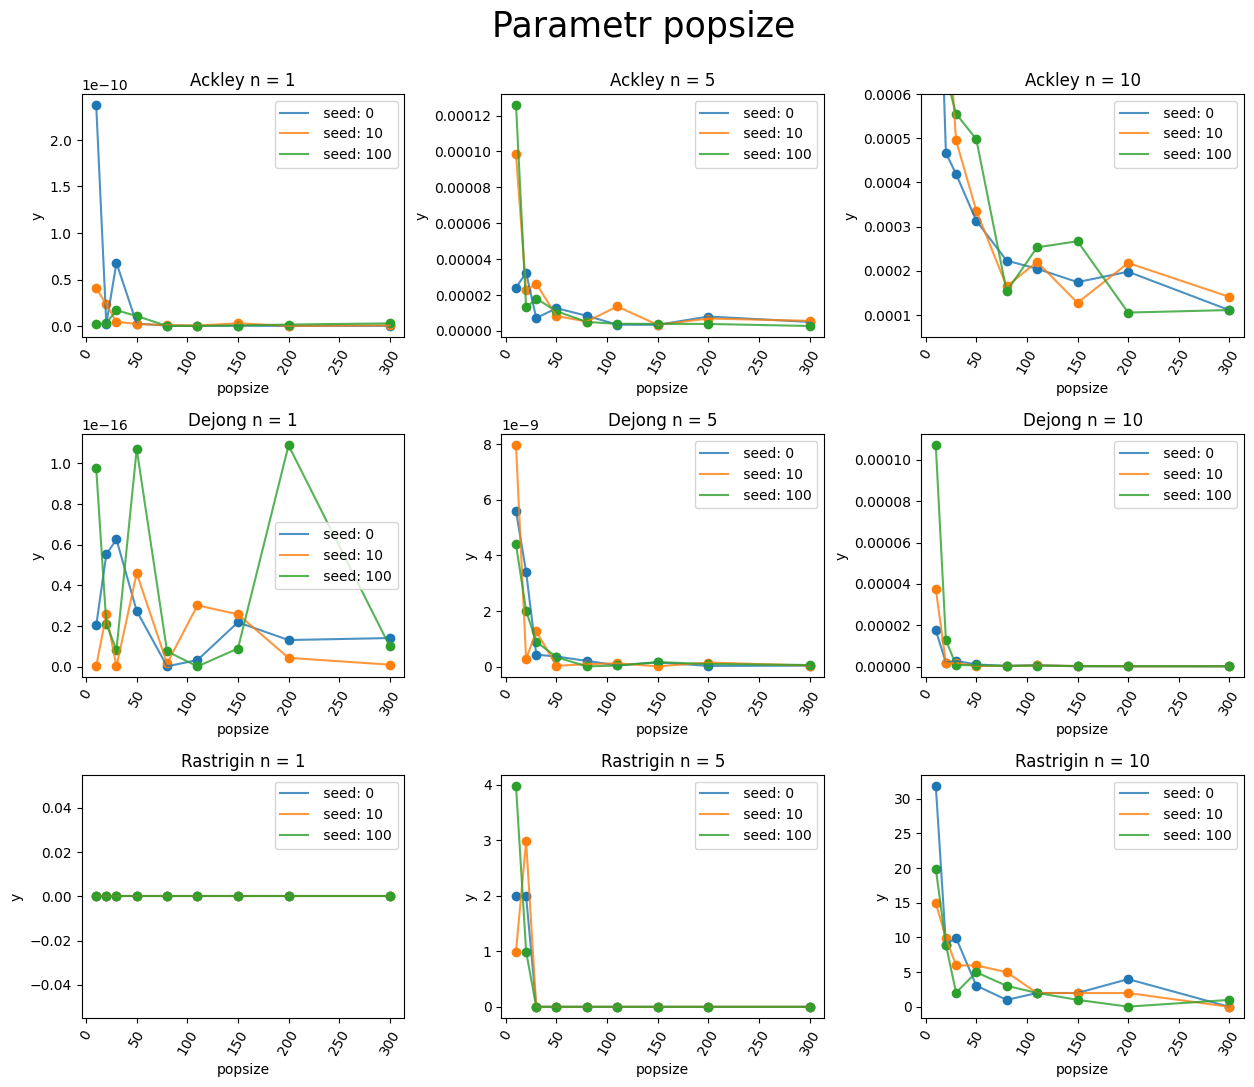

C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\3511117891.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),

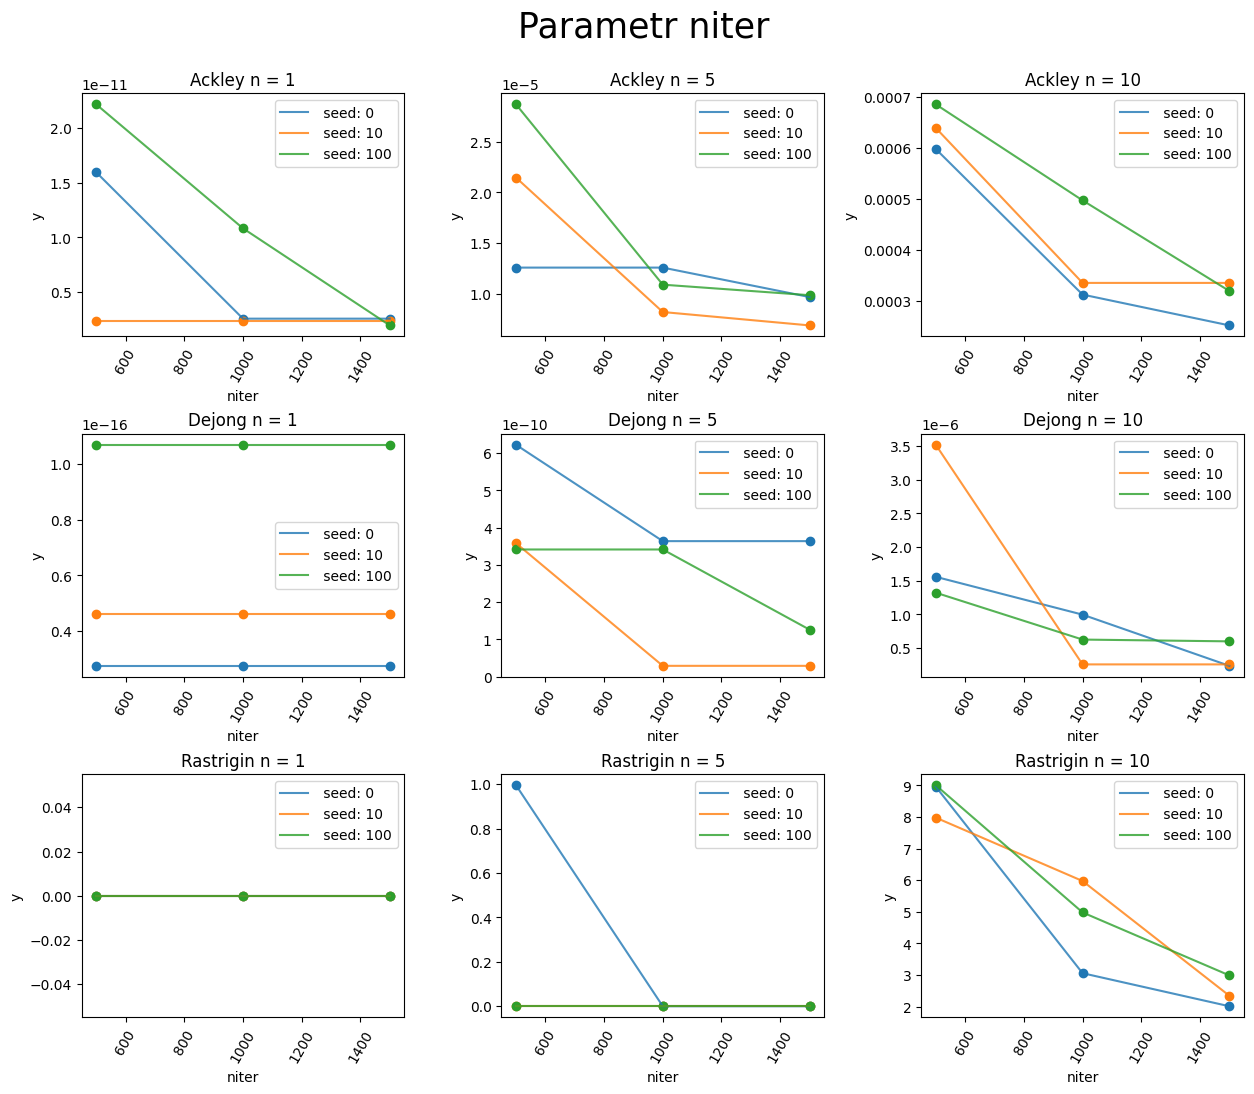

In [288]:
df = None
for fname in ['ackley','dejong','rastrigin']:
    for n in [1, 5, 10]:
        filename = f"./CW 10 PSO_OPT/results/{fname}/report_PSO_auto_{n}.txt"
        try:
            tdf = load_file(filename, fname, n)
        except Exception as e:
            print(e)
            continue
        if (type(df) == type(None)):
            df = tdf
        else:
            df = pd.concat([df, tdf])
df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]
dflt = df.head(1)
for param in ['c0','c1','c2','c3','iter_danger','neigh','popsize','niter']:
    plot_1(df,param)

C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\2074427785.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\2074427785.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\2074427785.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17828\2074427785.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fonts

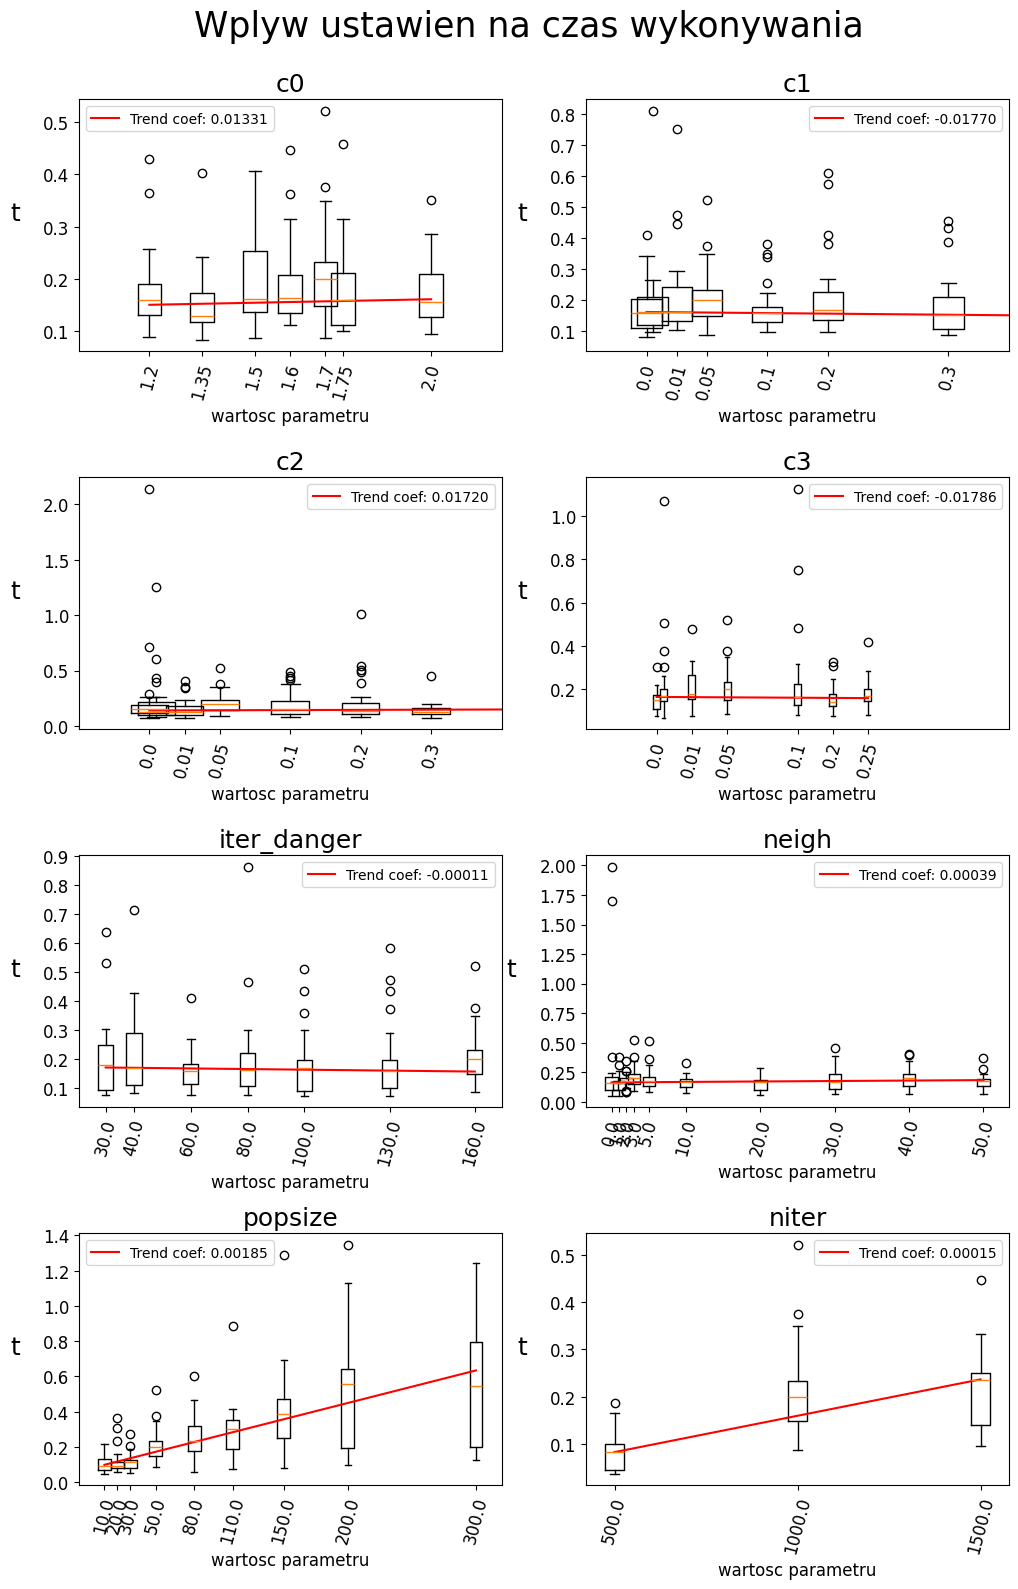

In [289]:
def plot_single(df,param,ax, y='t'):
    paramdf = df[df[param]!=dflt[param].values[0]].sort_values(by=param)
    dfltdf = df.loc[[0,1,2]]
    tdf = pd.concat([paramdf, dfltdf])
    w = max(np.unique(tdf[param]))/30
    for val in np.unique(tdf[param]):
        tdf2 = tdf[tdf[param] == val]
        ax.boxplot(tdf2[y], positions=[val], widths=[w])
    #ax.set_xlabel(param, fontsize=18)
    ax.set_title(f"{param}", fontdict={'fontsize':18})

    ax.set_xlabel("wartosc parametru", fontsize=12)
    ax.set_ylabel(y, labelpad=20, fontsize=18, rotation=0)
    if param in ['c1','c2','c3']:
                    t = ax.get_xticks()
                    t = t[t!=0.01]
                    ax.set_xticks(t)
    match param:
        case 'c0':
            ax.set_xlim([1,2.2])
        case 'c1':
            ax.set_xlim([-0.1,0.6])
        case 'c2':
            ax.set_xlim([-0.1,.5])
        case 'c3':
            ax.set_xlim([-0.1,.5])
    
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize=12)


y = 't'
fig, axs = plt.subplots(4,2, figsize=(12,18))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
i = -1
for param in ['c0','c1','c2','c3','iter_danger','neigh','popsize','niter']:
    i += 1
    axid1 = int(i/2)
    axid2 = i%2
    plot_single(df, param, axs[axid1, axid2],y)
    gb = df.groupby(by=param)
    gbdf = gb.median(numeric_only=True)[y]
    coef = np.polyfit(gbdf.index, gbdf.values, 1)
    trend = np.poly1d(coef)
    axs[axid1,axid2].plot(gbdf.index, trend(gbdf.index), color='red', label=f'Trend coef: {coef[0]:.5f}')
    axs[axid1,axid2].legend()
fig.suptitle("Wplyw ustawien na czas wykonywania", fontsize=25, y=0.93)
fig.savefig('./plots/time.png', bbox_inches='tight')


it       999.000000
ybest      2.984877
sum             NaN
ycurr    268.899000
Name: 999, dtype: float64


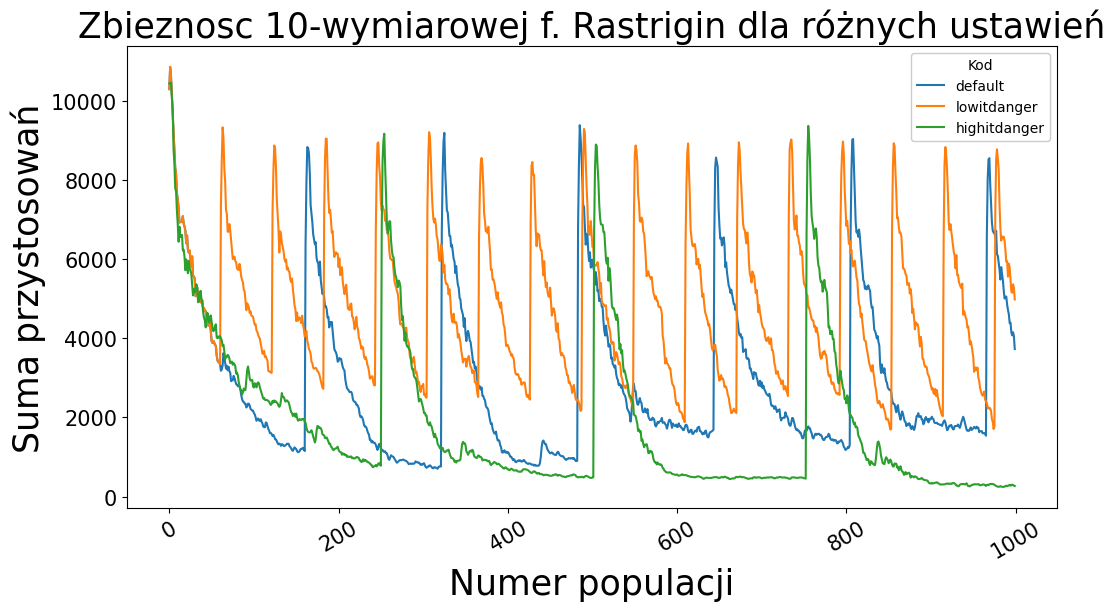

In [298]:
def init_df(n):
    columns = ['it','ybest','sum']
    return pd.DataFrame(columns=columns)
def proc_line(df, line, i=0):
    s = line.split(',')
    s.pop()
    #s = [float(x) for x in s]
    try:
        x = [s[0],s[1],s[2]]    
        return x
    except Exception as e:
        pass
def load_log(filename):
    with open(filename) as f:
        data = f.readlines()
        df = init_df(n)
        s = [proc_line(df,line, i) for i, line in enumerate(data)]
        
        df['it'] = [x[0] for x in s if x != None]
        df['ybest'] = [x[1] for x in s if x != None]
        df['ycurr'] = [x[2] for x in s if x != None]
        df.drop(df.tail(1).index,inplace=True)
        df = df.astype(float)
    return df


filename = "./CW 9 - EA_OPT/log.txt"
funcname = 'Rastrigin'
n=10
fig = plt.figure(figsize=(12,6))
step = 1

lognames = ['default','lowc0','highc0','lowc1','highc1','lowc2','highc2','lowc3','highc3','lowitdanger','highitdanger']
lognames = ['default','lowc0','highc0']
lognames = ['default','lowc1','highc1']
lognames = ['default','lowc2','highc2']
lognames = ['default','lowc3','highc3']
lognames = ['default','lowitdanger','highitdanger']
labels = lognames
for logname,label in zip(lognames, labels):
    #plt.plot(df.iloc[::step]['it'], df.iloc[::step]['ybest'],label='ybest')
    df = load_log(f'./CW 10 PSO_OPT/results/logs/log_{logname}.txt')
    plt.plot(df.iloc[::step]['it'], df.iloc[::step]['ycurr'],label=label)
    plt.title(f'Zbieznosc {n}-wymiarowej f. {funcname} dla różnych ustawień', fontsize = 25)
    plt.xlabel('Numer populacji', fontsize=25)
    plt.ylabel('Suma przystosowań', fontsize=25)
    plt.xticks(fontsize=15, rotation = 30)
    plt.yticks(fontsize=15)

plt.legend(title="Kod", framealpha=1)
print(df.loc[len(df)-1])
fig.savefig('./plots/conv.png',bbox_inches='tight')
plt.show()